In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Data Importing, Cleaning, & Filtering

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/collective-action/tech/master/actions.csv")
df["date"] = pd.to_datetime(df["date"])  # cast date col to datetime64
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,1,1979-09-01,['https://twitter.com/clancynewyork/status/117...,['protest'],['ethics'],['white_collar_workers'],"IBM workers formed an organization, IBM: Speak...",None,['worldwide'],['ibm'],None,['international_solidarity'],['nataliyaned'],None,None
1,2,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],Fourteen employees at AT&T sign a letter warni...,None,['usa'],['at&t'],14,None,['nataliyaned'],"[(45.5733162, -122.5587111463347)]","['AT&T, 10025, Northeast Cascades Parkway, Por..."
2,3,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],"A group of computer professionals, led by Comp...",None,['usa'],None,30,None,['nataliyaned'],"[(39.7837304, -100.4458825)]",['United States']
3,4,1994-01-24,['https://www.nytimes.com/1994/06/12/magazine/...,['open_letter'],['ethics'],['white_collar_workers'],Computer Professionals for Social Responsibili...,True,None,None,50000,None,['nataliyaned'],None,None
4,5,1998-11-23,['http://www.cnn.com/tech/computing/9811/23/ms...,['legal_action'],"['unfair_labor_practices', 'pay_and_benefits']",['contract_workers'],A law firm representing 10 current and former ...,None,['usa'],['microsoft'],10,None,['organizejs'],"[(35.139622349999996, -80.92306993327955)]","['Microsoft, Yorkwood, Charlotte, Mecklenburg ..."


In [14]:
df["struggles"] = df["struggles"].astype(str).str.strip("[]\'\'")
df["actions"] = df["actions"].astype(str).str.strip("[]\'\'")
df["companies"] = df["companies"].astype(str).str.strip("[]\'\'")
df["employment_types"] = df["employment_types"].astype(str).str.strip("[]\'\'")
df["sources"] = df["sources"].astype(str).str.strip("[]\'\'")
df["tags"] = df["tags"].astype(str).str.strip("[]\'\'")
df["locations"] = df["locations"].astype(str).str.strip("[]\'\'")

df["struggles"] = df["struggles"].astype(str).str.replace("'", "")
df["actions"] = df["actions"].astype(str).str.replace("'", "")
df["companies"] = df["companies"].astype(str).str.replace("'", "")
df["employment_types"] = df["employment_types"].astype(str).str.replace("'", "")
df["sources"] = df["sources"].astype(str).str.replace("'", "")
df["tags"] = df["tags"].astype(str).str.replace("'", "")
df["locations"] = df["locations"].astype(str).str.replace("'", "")

In [16]:
df = df[df["date"] >= "2020"]

In [19]:
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
225,224,2020-01-13,https://www.vice.com/amp/en_us/article/884npb/...,protest,pay_and_benefits,"blue_collar_workers, gig_workers","Many of the app's 130,000 workers claim to hav...",True,usa,instacart,None,None,['organizejs'],None,None
226,225,2020-01-26,https://www.washingtonpost.com/technology/2020...,open_letter,ethics,white_collar_workers,Amazon Employees for Climate Action published ...,True,None,amazon,364,climate_change,['nataliyaned'],None,None
227,226,2020-02-03,https://www.vice.com/en_ca/article/qjdvgm/inst...,union_representation,"pay_and_benefits, working conditions","blue_collar_workers, gig_workers",A group of Instacart employees in the Chicago ...,None,chicago-illinois-usa,instacart,10,None,['organizejs'],None,None
228,227,2020-02-03,https://www.nbcnews.com/news/all/amazon-worker...,protest,ethics,white_collar_workers,Members of Amazon Employees for Climate Justic...,True,None,amazon,3,None,['nataliyaned'],None,None
229,228,2020-02-05,https://www.sfchronicle.com/business/article/u...,legal_action,pay_and_benefits,gig_workers,Rideshare workers organized under Rideshare Dr...,None,california-usa,"uber, lyft",101,None,['nataliyaned'],"[(37.7899898, -122.3999799), (37.7509149, -122...","['Uber, 555, Market Street, Financial District..."


In [26]:
covid_df = df[["coronavirus" in x for x in df["tags"]]]
covid_df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
236,235,2020-03-06,https://fortune.com/2020/03/10/gig-workers-pet...,open_letter,"working conditions, unfair_labor_practices",gig_workers,Gig Workers Rising launched a petition calling...,True,california-usa,"uber, lyft, instacart, doordash",900,coronavirus,['organizejs'],"[(37.7899898, -122.3999799), (37.7509149, -122...","['Uber, 555, Market Street, Financial District..."
237,236,2020-03-12,https://www.vice.com/en_us/article/n7jkdx/bari...,"open_letter, legal_action",job_security,"blue_collar_workers, contract_workers",A group of five baristas who operate the espre...,None,san francisco-california-usa,slack,5,"coworker_solidarity, fund_raising, coronavirus",['organizejs'],"[(35.2960341, -120.6532192)]","['Slack Street, San Luis Obispo, San Luis Obis..."
239,238,2020-03-17,https://www.theverge.com/2020/3/17/21184495/go...,protest,unfair_labor_practices,"white_collar_workers, in_house_workers",Pittsburgh's office Google contractors employe...,None,pittsburgh-pennsylvania-usa,google,10,"coworker_solidarity, coronavirus",['organizejs'],None,None
240,239,2020-03-17,https://www.theverge.com/2020/3/17/21184495/go...,open_letter,unfair_labor_practices,"white_collar_workers, in_house_workers",A group of Google employees has sent a memo to...,True,usa,google,None,"coworker_solidarity, coronavirus",['organizejs'],"[(42.3627717, -71.087257)]","['Google, 355, Main Street, East Cambridge, Ca..."
241,240,2020-03-17,https://medium.com/@amazonemployeesclimatejust...,open_letter,working conditions,"blue_collar_workers, white_collar_workers",Over 5000 Amazon employees signed an open lett...,None,new york city-new york-usa,amazon,5210,"coronavirus, coworker_solidarity",['nataliyaned'],"[(40.722465, -73.9977307)]","['Amazon, 72, Spring Street, Little Italy, Man..."


In [73]:
non_covid_df = df[~np.array(["coronavirus" in x for x in df["tags"]])]
non_covid_df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
225,224,2020-01-13,https://www.vice.com/amp/en_us/article/884npb/...,protest,pay_and_benefits,"blue_collar_workers, gig_workers","Many of the app's 130,000 workers claim to hav...",True,usa,instacart,None,None,['organizejs'],None,None
226,225,2020-01-26,https://www.washingtonpost.com/technology/2020...,open_letter,ethics,white_collar_workers,Amazon Employees for Climate Action published ...,True,None,amazon,364,climate_change,['nataliyaned'],None,None
227,226,2020-02-03,https://www.vice.com/en_ca/article/qjdvgm/inst...,union_representation,"pay_and_benefits, working conditions","blue_collar_workers, gig_workers",A group of Instacart employees in the Chicago ...,None,chicago-illinois-usa,instacart,10,None,['organizejs'],None,None
228,227,2020-02-03,https://www.nbcnews.com/news/all/amazon-worker...,protest,ethics,white_collar_workers,Members of Amazon Employees for Climate Justic...,True,None,amazon,3,None,['nataliyaned'],None,None
229,228,2020-02-05,https://www.sfchronicle.com/business/article/u...,legal_action,pay_and_benefits,gig_workers,Rideshare workers organized under Rideshare Dr...,None,california-usa,"uber, lyft",101,None,['nataliyaned'],"[(37.7899898, -122.3999799), (37.7509149, -122...","['Uber, 555, Market Street, Financial District..."


# Visualization Function

In [11]:
'''
Function: vizcolumn(df, col, limit = None, include = None, remove = None, printlabels = False)
- df: Properly cleaned and formatted pandas dataframe.
- col: Column of interest in `df`.
- limit: Default `None`, will output all labels. The max number of labels in outputted chart.
- include: Default `None`. List of specific columns to include. 
  The number of labels to be included has to be less than `limit`, if defined.
- remove: Default `None`. List of specific columns to not include.
- printLabels: Default `False`. Print list of unique labels.

Output: None

Prints: Error messages or chart
'''

def vizcolumn(df, col, limit = None, include = None, remove = None, printLabels = False):
    '''Error Checking'''
    if not col in df.columns:
        print(col + "is not a column in df.")
        return None
    
    if (limit or limit == 0 or limit) and include:
        if len(include) > limit:
            print("Number of labels to include is greater than the given label limit.")
            return None
    
    if include and remove:
        union = include.extend(remove)
        if not len(set(union)) == len(include) + len(remove):
            print("Columns cannot be both included and removed.")
            return None
    
    '''Obtaining unique label values, checking the labels in `include`, 
    and removing the labels in `remove`'''
    lst = []
    for i in df[col].unique():
        lst.extend(i.split(", "))
        
    lst = list(set(lst))
    
    # Supplementary Error Checking
    if include:
        for i in include:
            if not i in lst:
                print(i + "is not an available label.")
                return None
    
    if remove:
        for r in remove:
            try:
                lst.remove(r)
            except ValueError:
                pass
            
    '''Print list of unique labels, if desired'''
    if printLabels:
        print(lst)
    
    ''' Counting instances of all label values'''
    count = []
    for i in lst:
        count.append(sum(df[col].str.contains(i)))

    '''Limiting to desired number of labels, including specified labels'''
    include_list = []
    include_count = []
    if include:
        if include:
            for i in include:
                ind = lst.index(i)
                lst.remove(i)
                include_list.append(i)
                
                i_count = count.pop(ind)
                include_count.append(i_count)
        limit = limit - len(include)

    if limit:                
        sorted_list = sorted(zip(lst, count), key = lambda x: x[1], reverse = True)
        sorted_list = sorted_list[:limit]
        
        lst, count = [], []
        for i, j in sorted_list:
            lst.append(i)
            count.append(j)
            
    lst.extend(include_list)
    count.extend(include_count)
    
    '''Print plot'''
    col_df = pd.DataFrame({col: lst, "count": count})
    
    col_df.plot(kind = "barh", x = col, y = "count", title = "Number of Occurrence by " + col)
    plt.show()

# Basic Visuals

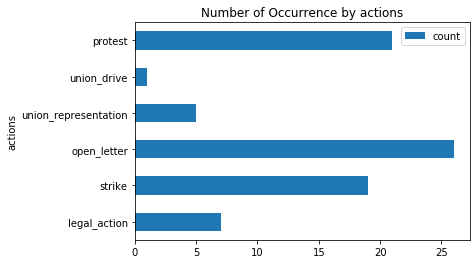

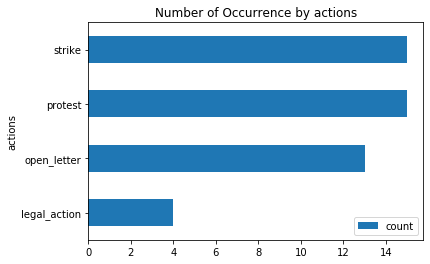

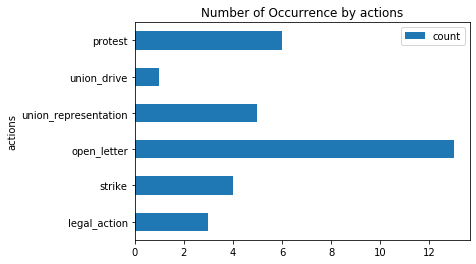

In [74]:
vizcolumn(df, "actions")
vizcolumn(covid_df, "actions")
vizcolumn(non_covid_df, "actions")

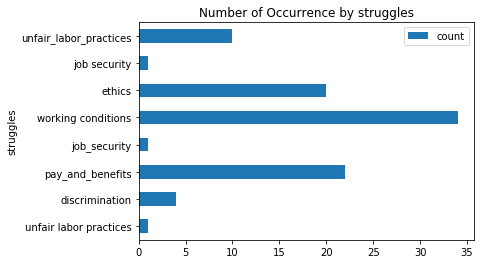

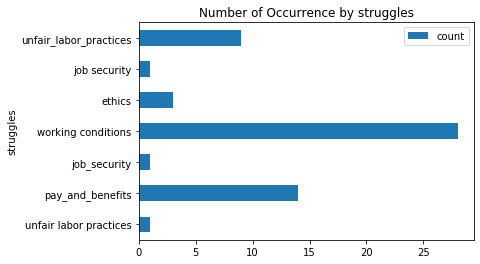

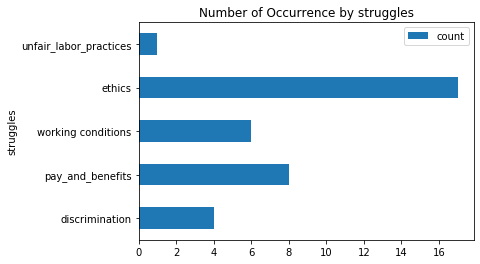

In [75]:
vizcolumn(df, "struggles", remove = ["na"])
vizcolumn(covid_df, "struggles", remove = ["na"])
vizcolumn(non_covid_df, "struggles", remove = ["na"])

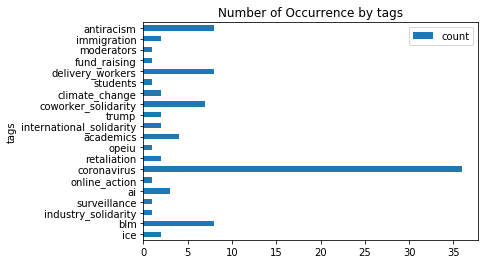

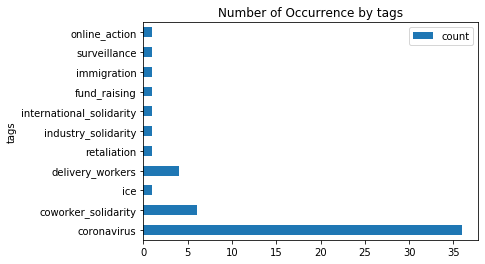

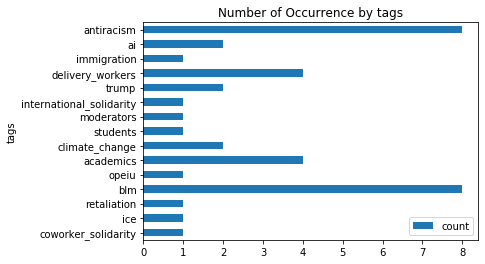

In [76]:
vizcolumn(df, "tags", remove = ["None", "na"])
vizcolumn(covid_df, "tags", remove = ["None", "na"])
vizcolumn(non_covid_df, "tags", remove = ["None", "na"])

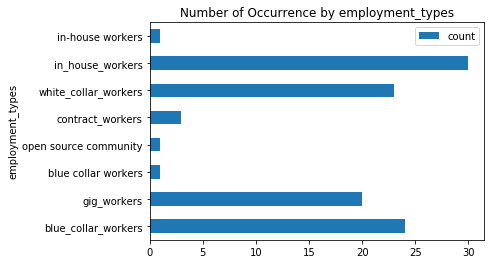

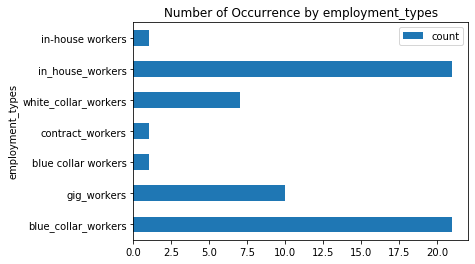

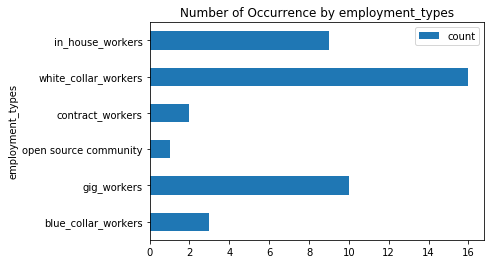

In [127]:
vizcolumn(df, "employment_types", remove = ["na"])
vizcolumn(covid_df, "employment_types")
vizcolumn(non_covid_df, "employment_types", remove = ["na"])

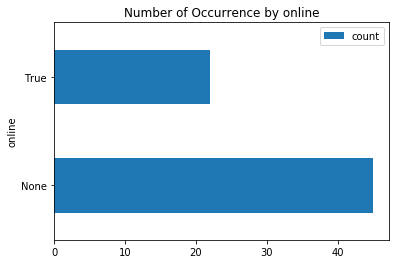

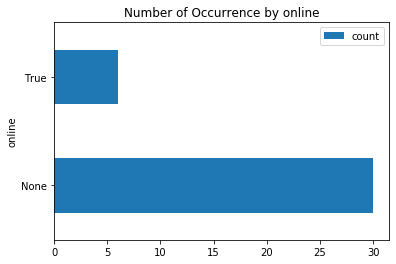

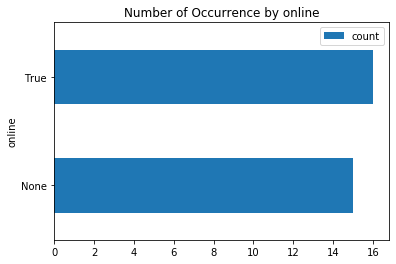

In [78]:
vizcolumn(df, "online")
vizcolumn(covid_df, "online")
vizcolumn(non_covid_df, "online")

In [115]:
df["coronavirus"] = ["coronavirus-related" if ("coronavirus" in x) else "non-coronavirus-related" for x in df["tags"]]

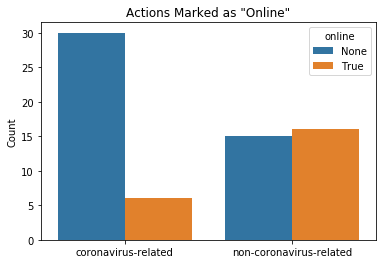

In [126]:
import seaborn as sns

online_df = df.groupby(["coronavirus", "online"]).count()
online_df = online_df.reset_index()

ax = sns.barplot(x="coronavirus", y="id", hue="online", data=online_df)
ax.set_title("Actions Marked as \"Online\"")
ax.set_xlabel("")
ax.set_ylabel("Count");

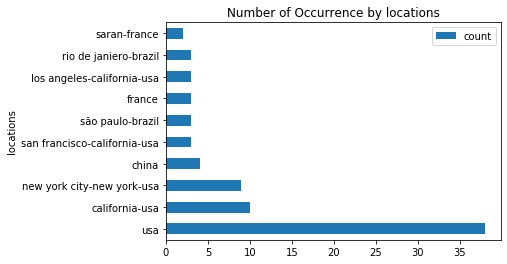

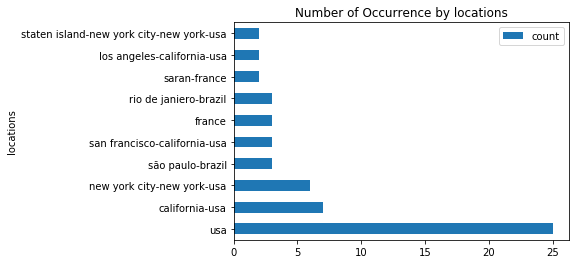

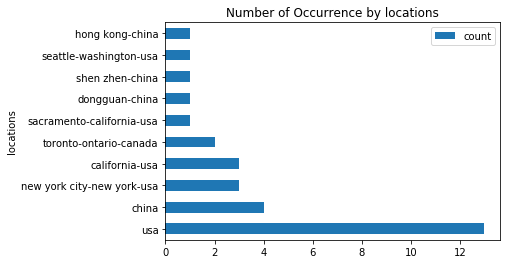

In [79]:
vizcolumn(df, "locations", limit = 10, remove = ["None"])
vizcolumn(covid_df, "locations", limit = 10, remove = ["None"])
vizcolumn(non_covid_df, "locations", limit = 10, remove = ["None"])

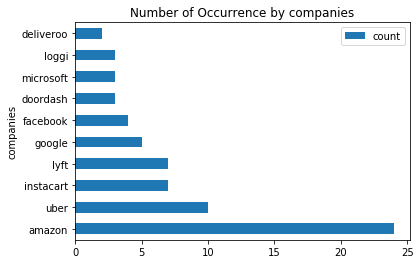

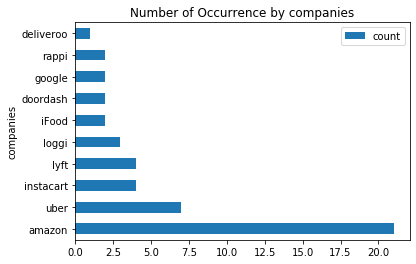

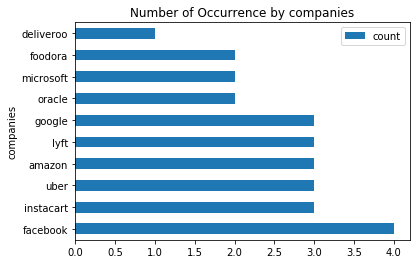

In [80]:
vizcolumn(df, "companies", limit = 10, remove = ["None"])
vizcolumn(covid_df, "companies", limit = 10, remove = ["None"])
vizcolumn(non_covid_df, "companies", limit = 10, remove = ["None"])

# Basic Statistics

In [42]:
len(df)

67

In [43]:
len(covid_df)

36

In [81]:
len(non_covid_df)

31

# Timeline of Events

Source Code: https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/timeline.html

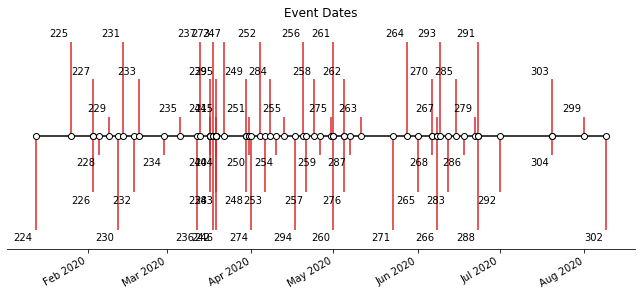

In [82]:
import matplotlib.dates as mdates

names = df["id"]

dates = df["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Event Dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

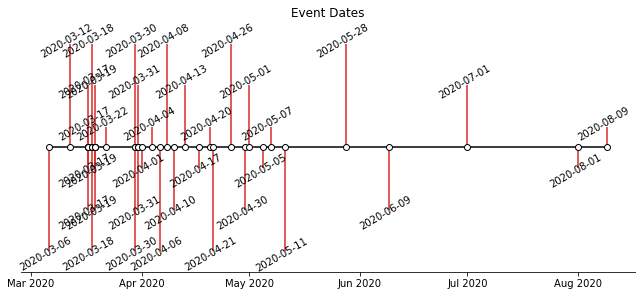

In [94]:
import matplotlib.dates as mdates

names = covid_df["date"]

dates = covid_df["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Event Dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(str(r)[:10], xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va="center", ha="center", rotation = 30)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), ha="center")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

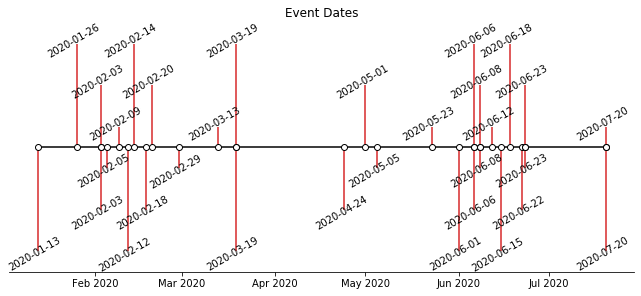

In [95]:
import matplotlib.dates as mdates

names = non_covid_df["date"]

dates = non_covid_df["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Event Dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(str(r)[:10], xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va="center", ha="center", rotation = 30)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), ha="center")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()